In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [120]:
data = pd.read_csv("Student Depression Dataset.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [122]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [123]:
data.dtypes

Data Types:
 id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [124]:
unique_counts = data.nunique()
unique_counts

,0
id,27901
Gender,2
Age,34
City,52
Profession,14
Academic Pressure,6
Work Pressure,3
CGPA,332
Study Satisfaction,6
Job Satisfaction,5


In [125]:
data.mode().iloc[0]

,0
id,2
Gender,Male
Age,24.0
City,Kalyan
Profession,Student
Academic Pressure,3.0
Work Pressure,0.0
CGPA,8.04
Study Satisfaction,4.0
Job Satisfaction,0.0


In [126]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [127]:
data['Financial Stress'].fillna(data['Financial Stress'].median(), inplace=True)
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


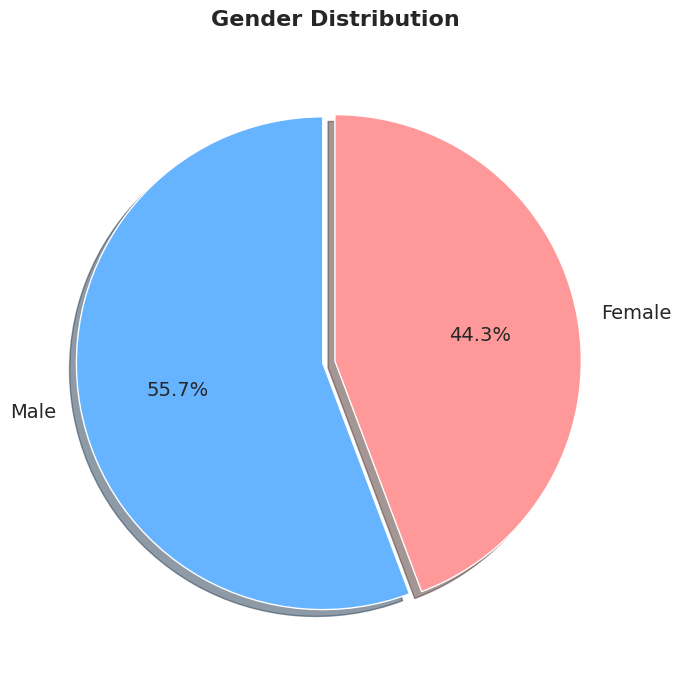

In [128]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 8))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#66b3ff', '#ff9999'], shadow=True, explode=(0.05, 0), textprops={'fontsize': 14})
plt.title('Gender Distribution', fontsize=16, fontweight='bold', pad=20)
plt.show()

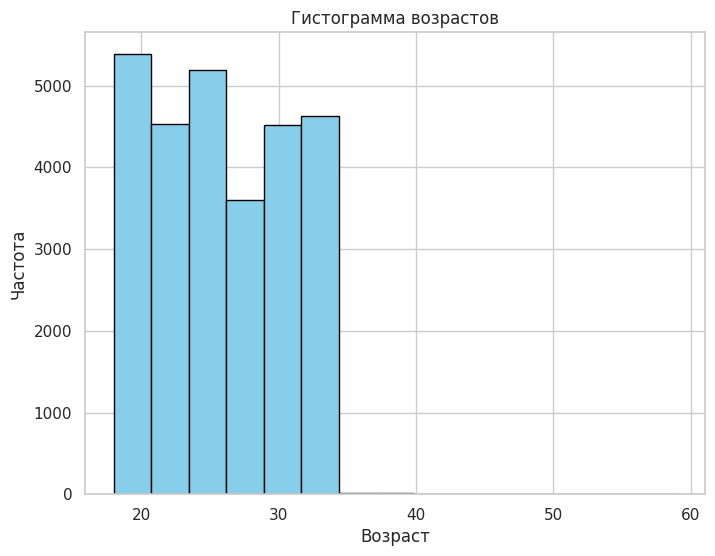

In [129]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Гистограмма возрастов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

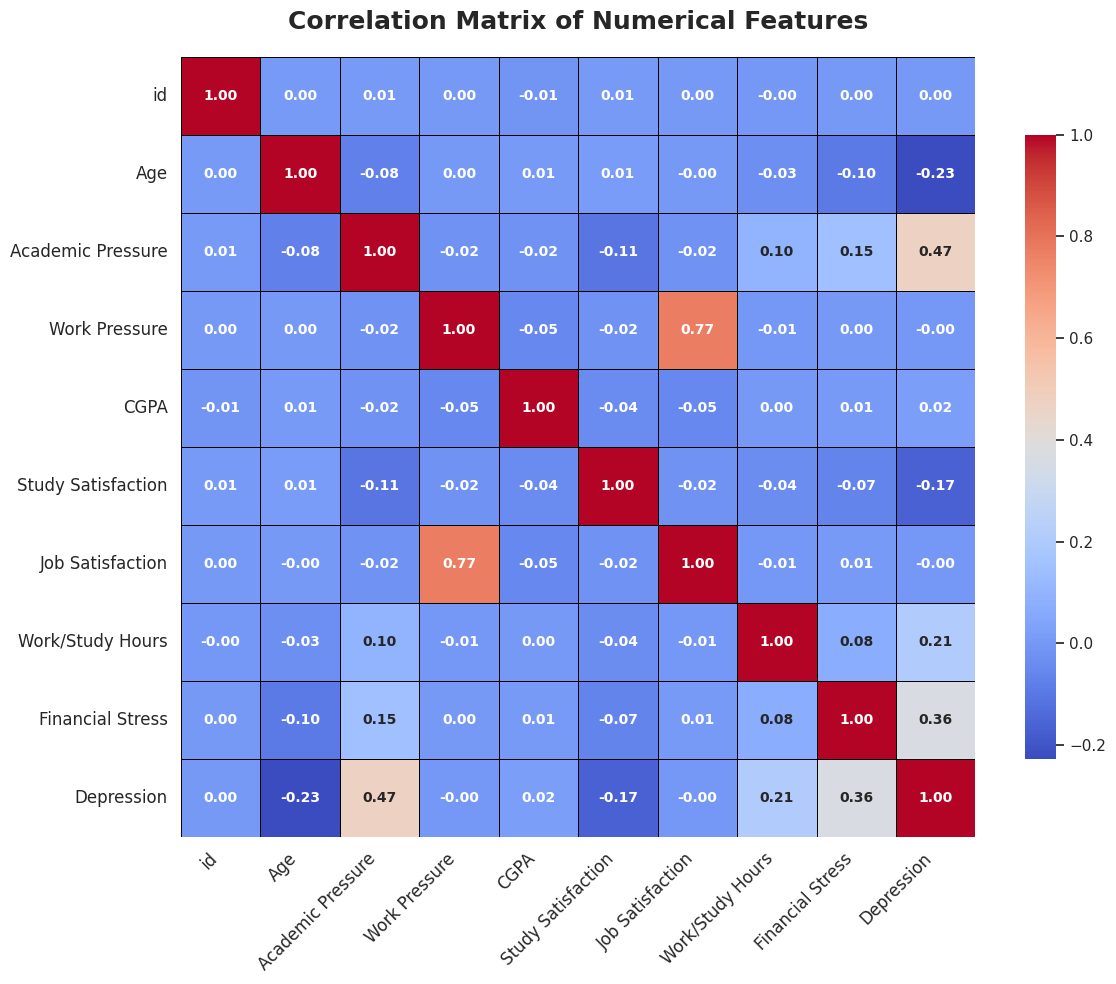

In [130]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.set_style("white")

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10, 'weight': 'bold'}
)

plt.title('Correlation Matrix of Numerical Features', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

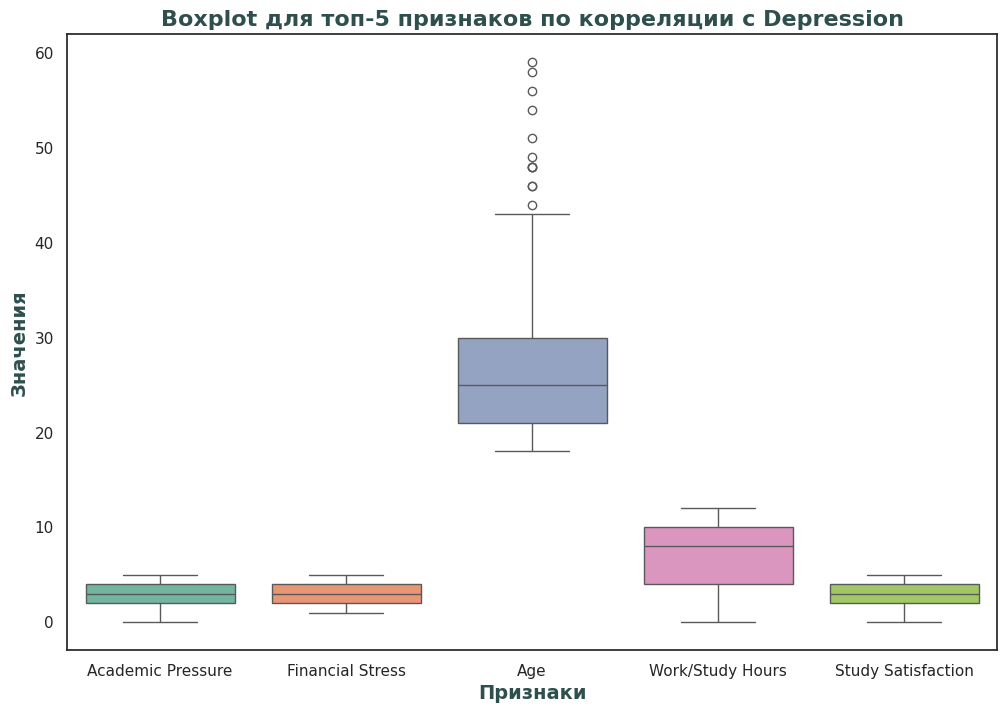

In [131]:
correlation_matrix = data.select_dtypes(include='number').corr()

top_features_corr = correlation_matrix['Depression'].abs().sort_values(ascending=False).head(6).index

top_features_corr = top_features_corr.drop('Depression')

plt.figure(figsize=(12, 8))
sns.boxplot(data=data[top_features_corr], palette='Set2')

plt.title('Boxplot для топ-5 признаков по корреляции с Depression', fontsize=16, fontweight='bold', color='darkslategray')
plt.xlabel('Признаки', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Значения', fontsize=14, fontweight='bold', color='darkslategray')

plt.show()

In [176]:
ordinal_mapping = {
    'Sleep Duration': {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 0},
    'Dietary Habits': {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others': 0}
}

for col, mapping in ordinal_mapping.items():
    data[col] = data[col].map(mapping)

binary_columns = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

data.head()

,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,5.0,8.97,2.0,0.0,NaN,NaN,NaN,3.0,1.0,NaN,1
1,2.0,5.90,5.0,0.0,NaN,NaN,NaN,3.0,2.0,NaN,0
2,3.0,7.03,5.0,0.0,NaN,NaN,NaN,9.0,1.0,NaN,0
3,3.0,5.59,2.0,0.0,NaN,NaN,NaN,4.0,5.0,NaN,1
4,4.0,8.13,3.0,0.0,NaN,NaN,NaN,1.0,1.0,NaN,0


In [133]:
data = data.drop(columns =  ['id','Age', 'Degree', 'Profession','Work Pressure','City', 'Gender'])
data.shape

(27901, 11)

In [134]:
X = data.drop(columns=['Depression'])
y = data['Depression']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [136]:
X_train

,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
1657,4.0,6.02,1.0,0.0,3,2,1,3.0,5.0,0
24995,3.0,6.37,2.0,0.0,3,2,0,9.0,1.0,1
27613,3.0,9.24,2.0,0.0,3,1,1,5.0,5.0,1
13512,3.0,7.37,5.0,0.0,3,2,1,12.0,3.0,0
27029,3.0,7.47,4.0,0.0,2,1,0,11.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...
23573,5.0,9.74,3.0,0.0,3,1,1,5.0,4.0,0
13135,5.0,6.39,3.0,0.0,1,1,1,8.0,3.0,1
26000,3.0,5.24,1.0,0.0,3,3,1,8.0,4.0,1
8380,4.0,7.15,2.0,0.0,2,1,1,1.0,3.0,0


In [184]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=80, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42)
}

results = pd.DataFrame(columns=['Model', 'Train ROC AUC', 'Test ROC AUC'])

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    train_roc_auc = roc_auc_score(y_train, y_train_proba)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)

    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Train ROC AUC': [train_roc_auc],
        'Test ROC AUC': [test_roc_auc]
    })], ignore_index=True)
    cross_validation_scores = cross_val_score(estimator = model,
                                              X = X_train,
                                              y = y_train,
                                              scoring = 'accuracy',
                                              n_jobs = -1,
                                              cv = 3
                                              )
    print(f'Cross Validation model: {name} ', cross_validation_scores.mean())

results

Cross Validation model: Random Forest  0.8207885304659499
Cross Validation model: Gradient Boosting  0.8382616487455197
Cross Validation model: Logistic Regression  0.8400985663082438
Cross Validation model: XGBoost  0.8278225806451612


,Model,Train ROC AUC,Test ROC AUC
0,Random Forest,0.999999,0.896962
1,Gradient Boosting,0.918683,0.910798
2,Logistic Regression,0.914346,0.910757
3,XGBoost,0.960997,0.903395


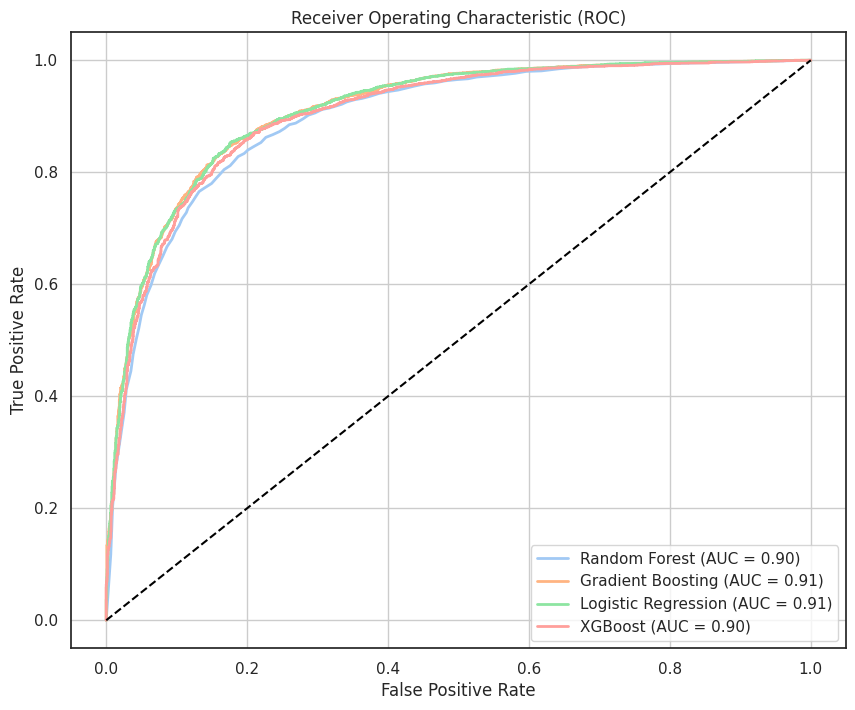

In [168]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

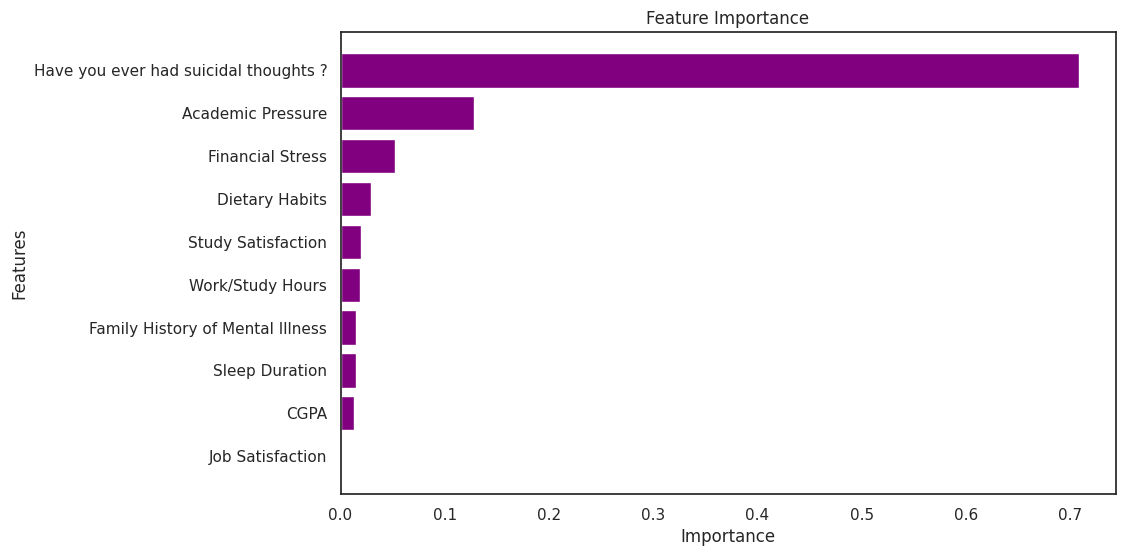

In [185]:
importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

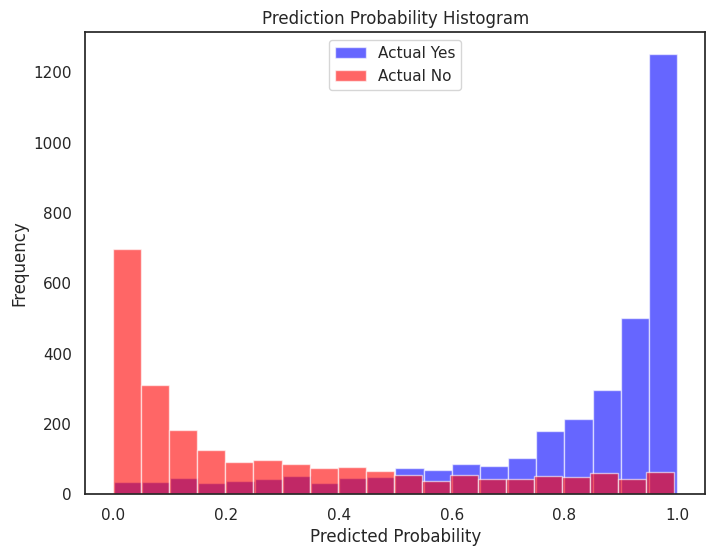

In [175]:
  y_prob = model.predict_proba(X_test)[:, 1]

  plt.figure(figsize=(8, 6))
  plt.hist(y_prob[y_test == 1], bins=20, alpha=0.6, color='blue', label='Actual Yes')
  plt.hist(y_prob[y_test == 0], bins=20, alpha=0.6, color='red', label='Actual No')
  plt.xlabel('Predicted Probability')
  plt.ylabel('Frequency')
  plt.title('Prediction Probability Histogram')
  plt.legend(loc='upper center')
  plt.show()